In [1]:
import numpy as np
import pandas as pd

In [2]:
# second data is the data were the ICD codes will be labelled by expert/medical rules. 
# However, we can still use the current ICD until the correct labels have been provided
X_train = pd.read_csv('Final_ToBeLabelled(ICD_INCLUDED)_EN.csv', sep='\t').drop(labels='ICD', axis =1)
y_train = pd.read_csv('Final_ToBeLabelled(ICD_INCLUDED)_EN.csv', sep='\t')['ICD'].astype('category') # as category 
X_train.shape, y_train.shape

((192, 16), (192,))

In [3]:
# first data is the unlabeled data which we will try to predict the ICD codes
X_unlab = pd.read_csv('Final_Unlabelled_EN.csv', sep='\t').drop(labels='ICD', axis=1)
X_unlab.shape

(17174, 16)

In [4]:
# preprocessing on X_train and X_unlab (label encoding)
X_train_sex = pd.get_dummies(data=X_train['Weiblich/Männlich'])
X_unlab_sex = pd.get_dummies(data=X_unlab['Weiblich/Männlich'])
X_train_age = pd.get_dummies(data=X_train['age'])
X_unlab_age = pd.get_dummies(data=X_unlab['age'])

In [5]:
# drop the UUID, age and sex columns from the data
X_unlab.drop(labels=['UUID', 'age','Weiblich/Männlich'], axis=1, inplace=True)
X_train.drop(labels=['age','Weiblich/Männlich', 'UUID'],axis=1,inplace=True)

In [6]:
# shape of the train data
X_train.shape,X_train_age.shape,X_train_sex.shape

((192, 13), (192, 8), (192, 2))

In [7]:
# shape of the unlab
X_unlab.shape,X_unlab_sex.shape, X_unlab_age.shape

((17174, 13), (17174, 2), (17174, 8))

In [8]:
# after the preprocessing,instantiate call it X_train_p
X_train_p = pd.concat([X_train_sex,X_train_age,X_train],axis=1).astype('float')
X_train_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   F                                   192 non-null    float64
 1   M                                   192 non-null    float64
 2   (1, 15]                             192 non-null    float64
 3   (15, 20]                            192 non-null    float64
 4   (20, 30]                            192 non-null    float64
 5   (30, 40]                            192 non-null    float64
 6   (40, 50]                            192 non-null    float64
 7   (50, 60]                            192 non-null    float64
 8   (60, 70]                            192 non-null    float64
 9   (70, 150]                           192 non-null    float64
 10  Grübchenabstand DL-DR [mm]          192 non-null    float64
 11  Rumpflänge VP-DM [mm]               192 non-n

In [9]:
# after the preprocessing,instantiate call it X_unlab_p
X_unlab_p = pd.concat([X_unlab_sex,X_unlab_age,X_unlab],axis=1).astype('float')
X_unlab_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17174 entries, 0 to 17173
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   F                                   17174 non-null  float64
 1   M                                   17174 non-null  float64
 2   (1, 15]                             17174 non-null  float64
 3   (15, 20]                            17174 non-null  float64
 4   (20, 30]                            17174 non-null  float64
 5   (30, 40]                            17174 non-null  float64
 6   (40, 50]                            17174 non-null  float64
 7   (50, 60]                            17174 non-null  float64
 8   (60, 70]                            17174 non-null  float64
 9   (70, 150]                           17174 non-null  float64
 10  Grübchenabstand DL-DR [mm]          17174 non-null  float64
 11  Rumpflänge VP-DM [mm]               17174

In [10]:
# creating our baseline model
from sklearn.svm import SVC
model = SVC( C=1.0,kernel='linear',degree=3,gamma='scale',probability=True)

In [11]:
# Training on the label sets
model.fit(X_train_p,y_train)

SVC(kernel='linear', probability=True)

In [12]:
# Score of the label sets
model.score(X_train_p,y_train)

1.0

In [16]:
# Predict on Unlabeled dataset after the trainning
label_as = model.predict(X_unlab_p)
label_as[:10]

array(['M75.3', 'M21.07', 'M23.32', 'M92.5', 'S93.6', 'M40.56', 'M75.1',
       'M40.56', 'M19.91', 'M54.86'], dtype=object)

In [17]:
# Probability Predict on Unlabeled dataset after the trainning
clp = model.predict_proba(X_unlab_p)
clp

array([[0.00365806, 0.00384228, 0.00525969, ..., 0.00378855, 0.01117049,
        0.00429284],
       [0.00312474, 0.00403844, 0.00612228, ..., 0.00317099, 0.01456104,
        0.00475789],
       [0.00384374, 0.00382629, 0.00542758, ..., 0.00359107, 0.01162538,
        0.00437364],
       ...,
       [0.00291755, 0.0035967 , 0.00654102, ..., 0.00312648, 0.01695909,
        0.00499957],
       [0.00291383, 0.00357605, 0.00655372, ..., 0.0031268 , 0.01703426,
        0.00500721],
       [0.0034438 , 0.00384366, 0.00578075, ..., 0.00331309, 0.01288785,
        0.00456885]])

In [80]:
df = pd.DataFrame(clp, columns=y_train[:])
df.head()

ICD,G58.0,M48.00,M18.0,M24.68,M42.97,M54.99,G56.9,M40.50,M93.9,S13.4,...,M79.18,M75.3,M51.2,M40.56,M41.00,Q66.8,M40.46,M40.24,M17.0,M62.48
0,0.003658,0.003842,0.005260,0.007433,0.003786,0.003732,0.003441,0.004722,0.003459,0.012744,...,0.003327,0.006553,0.004067,0.003779,0.003405,0.006701,0.007061,0.003789,0.011170,0.004293
1,0.003125,0.004038,0.006122,0.009481,0.003199,0.003958,0.003842,0.005327,0.003340,0.017253,...,0.003941,0.007997,0.004280,0.003994,0.003934,0.005230,0.008827,0.003171,0.014561,0.004758
2,0.003844,0.003826,0.005428,0.007785,0.003805,0.003724,0.003499,0.004839,0.003599,0.013333,...,0.003389,0.006816,0.004073,0.003765,0.003465,0.006426,0.007371,0.003591,0.011625,0.004374
3,0.003328,0.003897,0.004850,0.006683,0.003374,0.003773,0.003365,0.004427,0.003203,0.011761,...,0.003243,0.005962,0.004137,0.003828,0.003326,0.007257,0.006396,0.003571,0.010397,0.004134
4,0.003110,0.004054,0.004430,0.005878,0.003075,0.003917,0.003399,0.004190,0.003058,0.011123,...,0.003265,0.005302,0.003472,0.003981,0.003355,0.008008,0.005682,0.003198,0.009893,0.004104


In [78]:
# maximum value predicted for each label
maximum_value = df[df.columns].max(axis=1)
maximum_value = pd.DataFrame(data=maximum_value, columns=['Maximum_value'])
maximum_value.head(3)

,Maximum_value
0,0.013400
1,0.018407
2,0.013974


In [77]:
# dataframe of the predicted Label
df_l = pd.DataFrame(data=label_as, columns=['Label_as'])
df_l.head(3)

,Label_as
0,M75.3
1,M21.07
2,M23.32


In [58]:
# DataFrame of the Maximum probabiliy of predicting each label and the Label that was predicted...
df_la_max =pd.concat([df_l,maximum_value,df], axis=1)
df_la_max.head(10)

,Label_as,Maximum_value,G58.0,M48.00,M18.0,M24.68,M42.97,M54.99,G56.9,M40.50,...,M79.18,M75.3,M51.2,M40.56,M41.00,Q66.8,M40.46,M40.24,M17.0,M62.48
0,M75.3,0.013400,0.003658,0.003842,0.005260,0.007433,0.003786,0.003732,0.003441,0.004722,...,0.003327,0.006553,0.004067,0.003779,0.003405,0.006701,0.007061,0.003789,0.011170,0.004293
1,M21.07,0.018407,0.003125,0.004038,0.006122,0.009481,0.003199,0.003958,0.003842,0.005327,...,0.003941,0.007997,0.004280,0.003994,0.003934,0.005230,0.008827,0.003171,0.014561,0.004758
2,M23.32,0.013974,0.003844,0.003826,0.005428,0.007785,0.003805,0.003724,0.003499,0.004839,...,0.003389,0.006816,0.004073,0.003765,0.003465,0.006426,0.007371,0.003591,0.011625,0.004374
3,M92.5,0.016302,0.003328,0.003897,0.004850,0.006683,0.003374,0.003773,0.003365,0.004427,...,0.003243,0.005962,0.004137,0.003828,0.003326,0.007257,0.006396,0.003571,0.010397,0.004134
4,S93.6,0.020635,0.003110,0.004054,0.004430,0.005878,0.003075,0.003917,0.003399,0.004190,...,0.003265,0.005302,0.003472,0.003981,0.003355,0.008008,0.005682,0.003198,0.009893,0.004104
5,M40.56,0.013879,0.003594,0.003850,0.005196,0.007295,0.003689,0.003740,0.003425,0.004678,...,0.003310,0.006456,0.004074,0.003787,0.003389,0.006804,0.006948,0.003862,0.011024,0.004266
6,M75.1,0.020125,0.003132,0.004036,0.004479,0.005970,0.003103,0.003902,0.003395,0.004185,...,0.003262,0.005387,0.003540,0.003966,0.003351,0.007930,0.005767,0.003233,0.009949,0.004126
7,M40.56,0.014066,0.003569,0.003852,0.005170,0.007239,0.003658,0.003742,0.003419,0.004658,...,0.003303,0.006417,0.004076,0.003790,0.003383,0.006842,0.006902,0.003879,0.010967,0.004254
8,M19.91,0.014490,0.003514,0.003860,0.005107,0.007132,0.003590,0.003746,0.003404,0.004613,...,0.003287,0.006325,0.004084,0.003796,0.003368,0.006924,0.006799,0.003862,0.010837,0.004227
9,M54.86,0.013742,0.003779,0.003814,0.005372,0.007603,0.003871,0.003724,0.003477,0.004799,...,0.003366,0.006729,0.004064,0.003767,0.003444,0.006509,0.007266,0.003644,0.011465,0.004345


In [63]:
# visualization librarie
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

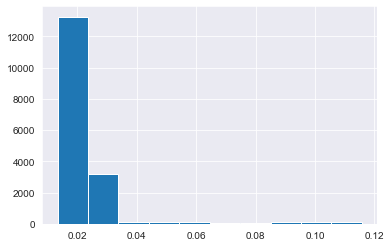

In [65]:
# distribution of the maximum value
plt.hist(df_la_max['Maximum_value'])
plt.show()